In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


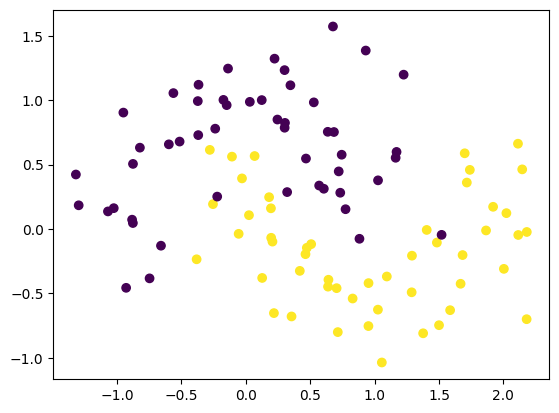

In [3]:
plt.scatter(df[0],df[1],c=df[2])

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[-0.43877584,  0.00345117, -0.5039841 , -0.5386244 , -0.49279663,
         -0.42582867, -0.26947126, -0.45278326,  0.07775182,  0.00595111],
        [ 0.30667275, -0.07783359,  0.22624952,  0.20535684,  0.200602  ,
          0.45205396,  0.16775662,  0.5740952 , -0.18504846, -0.5333512 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.46360338,  0.05296826,  0.43509603, -0.3144167 , -0.37985384,
         -0.29550847, -0.50023925, -0.0580416 ,  0.43566215,  0.02274984],
        [-0.4985212 , -0.3382691 , -0.16149673,  0.228401  , -0.49431384,
         -0.02631348, -0.33431494, -0.00518757, -0.23746818, -0.07423964],
        [ 0.10636437, -0.1090517 ,  0.28217345,  0.37502122, -0.3261791 ,
          0.19712704,  0.33419794, -0.1654309 , -0.5090505 , -0.4612716 ],
        [-0.2652543 , -0.05736187,  0.12409002,  0.21859896, -0.521044  ,
         -0.24338731,  0.5109017 ,  0.43440485, -0.0835689 , -0.54362047],
        [-0.18096

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[ 0.09050019, -2.405113  , -0.5473936 ,  0.754805  ,  0.8932132 ,
          0.28964445, -0.5283143 , -0.508708  , -0.13074271, -0.48450768],
        [ 0.39169082, -0.60458195, -0.9080221 ,  0.25378516,  0.2783818 ,
         -0.00755226,  0.5530489 ,  0.98986584, -0.05279793, -0.7501247 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.41946173, -0.04317683,  0.29798406, -0.13745111,  0.12395764,
         -0.03109443,  0.2995544 , -0.12899134,  0.21276599, -0.12224562],
        [ 0.60530066, -0.0931175 ,  0.70591146,  0.18616909, -0.1611401 ,
          0.6861701 , -0.4736837 ,  0.01291592,  0.04168977,  0.0481384 ],
        [-0.20508748, -0.20824778, -0.01465746, -0.3562727 , -0.8413451 ,
          0.09552823,  0.32522908, -0.290719  ,  0.065546  ,  0.1987977 ],
        [ 0.26172024, -0.08503705, -0.39830065, -0.26696137, -0.10134421,
          0.16235073, -0.39832288, -0.07596305,  0.25296825, -0.3078641 ],
        [-0.34855

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.3789 - loss: 0.8304 - val_accuracy: 0.2000 - val_loss: 0.9269
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3695 - loss: 0.8259 - val_accuracy: 0.2500 - val_loss: 0.8823
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3812 - loss: 0.7697 - val_accuracy: 0.2500 - val_loss: 0.8402
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4430 - loss: 0.7406 - val_accuracy: 0.3000 - val_loss: 0.7995
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4812 - loss: 0.7109 - val_accuracy: 0.3000 - val_loss: 0.7607
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5070 - loss: 0.7005 - val_accuracy: 0.4500 - val_loss: 0.7239
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6086 - loss: 0.6560 - val_accuracy: 0.5500 - val_loss: 0.6904
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6789 - loss: 0.6408 - val_accuracy: 0.7000 - val_loss

In [14]:
model.get_weights()

[array([[-0.02169247, -2.3456004 , -0.50199485,  0.7616063 ,  0.7825748 ,
          0.36167982, -0.43200386, -0.53706014,  0.00758465, -0.526923  ],
        [ 0.48952103, -0.60007554, -0.9628162 ,  0.17662382,  0.1805817 ,
         -0.1064759 ,  0.5422151 ,  1.108049  , -0.08387085, -0.7126013 ]],
       dtype=float32),
 array([0.02880569, 0.12663057, 0.11507183, 0.0730162 , 0.03871997,
        0.07826795, 0.11082707, 0.05461875, 0.06349594, 0.05084918],
       dtype=float32),
 array([[ 0.5298946 ,  0.05364492,  0.42054647, -0.2285659 ,  0.18247022,
         -0.09722076,  0.40248674, -0.0738687 ,  0.10574049, -0.02078561],
        [ 0.5150304 , -0.08806396,  0.5431513 ,  0.27360412, -0.11880664,
          0.65099066, -0.5089655 ,  0.1268689 ,  0.02899935,  0.07494078],
        [-0.2868523 , -0.2765286 , -0.14872332, -0.26380795, -0.8247222 ,
          0.13157688,  0.26261127, -0.33688197,  0.1441179 ,  0.10501528],
        [ 0.30710325, -0.12337613, -0.25368965, -0.30359572, -0.1826372

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

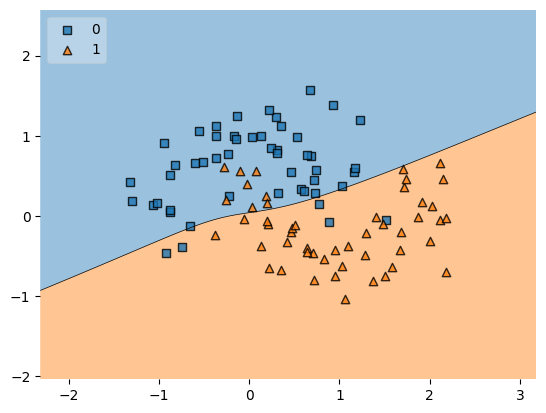

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [16]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.02575580939299609)

In [17]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.03136686865132281)

In [18]:
print("The End")

The End
